![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción producción de toneladas de café diaria**

**Métodos estadísticos para analítica de datos** <br>

Docente: Luis Andrés Campos Maldonado <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

![Tarea](https://file.notion.so/f/f/f34f306e-d9b5-494b-b818-5da09ff1677a/8ec70526-7346-4038-af12-aecbfc968fd2/image.png?table=block&id=111552c0-2d01-80ed-b486-de7d3fff6db1&spaceId=f34f306e-d9b5-494b-b818-5da09ff1677a&expirationTimestamp=1727827200000&signature=FRTD8cTXDHdItIfpAcorwW5HuawMCywhFPWqJVqDR1o&downloadName=image.png)

In [ ]:
# Cargar el archivo utils.py, este archivo contiene las librerias necesarias y algunos modulos a utilizar en el proceso

from utils import *

ModuleNotFoundError: No module named 'utils'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Series de tiempo/Informaci_n_financiera_con_fines_de_supervisi_n___CUIF_por_moneda_Entidades_vigiladas_20241102.csv'
df = pd.read_csv(file_path)
df

,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,FECHA_CORTE,CUENTA,NOMBRE_CUENTA,MONEDA,NOMBRE MONEDA,SIGNO_VALOR,VALOR
0,5,SOCIEDADES FIDUCIARIAS,18,FIDUCIARIA POPULAR S.A.,31/01/2016,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,2.146966e+09
1,5,SOCIEDADES FIDUCIARIAS,3,BBVA ASSET MANAGEMENT S.A. S.F.,31/01/2016,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,3.252449e+08
2,5,SOCIEDADES FIDUCIARIAS,18,FIDUCIARIA POPULAR S.A.,31/01/2016,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,6.578593e+08
3,5,SOCIEDADES FIDUCIARIAS,22,FIDUCIARIA BOGOTA S.A.,31/01/2016,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,8.763785e+09
4,5,SOCIEDADES FIDUCIARIAS,24,CITITRUST COLOMBIA S.A. S.F.,31/01/2016,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,1.841861e+10
...,...,...,...,...,...,...,...,...,...,...,...
4877,5,SOCIEDADES FIDUCIARIAS,42,FIDUCIARIA DAVIVIENDA S.A.,31/08/2024,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,7.395270e+09
4878,5,SOCIEDADES FIDUCIARIAS,64,S3 CACEIS COLOMBIA S.A. SF,31/08/2024,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,2.719267e+09
4879,5,SOCIEDADES FIDUCIARIAS,34,SERVITRUST GNB SUDAMERIS S.A.,31/08/2024,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,1.703387e+07
4880,5,SOCIEDADES FIDUCIARIAS,16,ALIANZA FIDUCIARIA S.A.,31/08/2024,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,1.860556e+09


In [ ]:
# Cargar el DataSet

import requests
import pandas as pd

# URL de la API con la consulta SQL incluida
url = "https://www.datos.gov.co/resource/mxk5-ce6w.json?$query=SELECT%0A%20%20%60tipo_entidad%60%2C%0A%20%20%60nombre_tipo_entidad%60%2C%0A%20%20%60codigo_entidad%60%2C%0A%20%20%60nombre_entidad%60%2C%0A%20%20%60fecha_corte%60%2C%0A%20%20%60cuenta%60%2C%0A%20%20%60nombre_cuenta%60%2C%0A%20%20%60moneda%60%2C%0A%20%20%60nombre_moneda%60%2C%0A%20%20%60signo_valor%60%2C%0A%20%20%60valor%60%0AWHERE%0A%20%20caseless_one_of(%60nombre_moneda%60%2C%20%22Total%22)%0A%20%20AND%20((%60tipo_entidad%60%20%3D%205)%0A%20%20%20%20%20%20%20%20%20AND%20caseless_one_of(%60cuenta%60%2C%20%22169400%22%2C%20%22161030%22))"

# Realiza la solicitud GET
response = requests.get(url)

# Verifica si la solicitud fue exitosa
if response.status_code == 200:
    # Cargar los datos en un DataFrame de pandas
    data = response.json()
    df = pd.DataFrame(data)

    # Muestra la tabla completa en la terminal
    print(df.to_string())



In [13]:
#Validar el tipo de datos de cada columna y si tiene datos nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TIPO_ENTIDAD         4882 non-null   int64  
 1   NOMBRE_TIPO_ENTIDAD  4882 non-null   object 
 2   CODIGO_ENTIDAD       4882 non-null   int64  
 3   NOMBRE_ENTIDAD       4882 non-null   object 
 4   FECHA_CORTE          4882 non-null   object 
 5   CUENTA               4882 non-null   int64  
 6   NOMBRE_CUENTA        4882 non-null   object 
 7   MONEDA               4882 non-null   int64  
 8   NOMBRE MONEDA        4882 non-null   object 
 9   SIGNO_VALOR          4882 non-null   object 
 10  VALOR                4882 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 419.7+ KB


In [15]:
# Ajustar el df para que sea una serie de tiempo

df.index = df['FECHA_CORTE'] # Definir la columna fecha como index
df.drop(columns=['FECHA_CORTE'],inplace=True) # Eliminar la columna fecha
df

,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,CUENTA,NOMBRE_CUENTA,MONEDA,NOMBRE MONEDA,SIGNO_VALOR,VALOR
FECHA_CORTE,,,,,,,,,,
31/01/2016,5,SOCIEDADES FIDUCIARIAS,18,FIDUCIARIA POPULAR S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,2.146966e+09
31/01/2016,5,SOCIEDADES FIDUCIARIAS,3,BBVA ASSET MANAGEMENT S.A. S.F.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,3.252449e+08
31/01/2016,5,SOCIEDADES FIDUCIARIAS,18,FIDUCIARIA POPULAR S.A.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,6.578593e+08
31/01/2016,5,SOCIEDADES FIDUCIARIAS,22,FIDUCIARIA BOGOTA S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,8.763785e+09
31/01/2016,5,SOCIEDADES FIDUCIARIAS,24,CITITRUST COLOMBIA S.A. S.F.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,1.841861e+10
...,...,...,...,...,...,...,...,...,...,...
31/08/2024,5,SOCIEDADES FIDUCIARIAS,42,FIDUCIARIA DAVIVIENDA S.A.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,7.395270e+09
31/08/2024,5,SOCIEDADES FIDUCIARIAS,64,S3 CACEIS COLOMBIA S.A. SF,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,2.719267e+09
31/08/2024,5,SOCIEDADES FIDUCIARIAS,34,SERVITRUST GNB SUDAMERIS S.A.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,1.703387e+07


# Entendimiento de los datos

- Graficar la serie de tiempo original
- Descomponer la serie de tiempo original

In [16]:
serie_de_tiempo(df,'VALOR')

NameError: name 'serie_de_tiempo' is not defined

In [ ]:
Serie_decompuesta = seasonal_decompose (df['valor'],model = 'multiplicative')
grafico1 = Serie_decompuesta.plot()

NameError: name 'seasonal_decompose' is not defined

# Modelos SARIMA

Aplicar la metodologia Box Jenkins

![Metodología Box Jenkinks](attachment:image.png)


## Identificación

In [ ]:
plot_time_series_analysis(df,'valor')

NameError: name 'plot_time_series_analysis' is not defined

In [ ]:
# prueba de Dickey Fuller para las series

from statsmodels.tsa.stattools import adfuller

SerieOriginal_adf = adfuller(df['valor'])

print('ADF Statistic:', SerieOriginal_adf[0])
print('p-value:', SerieOriginal_adf[1])
print('Critical Values:')
for key, value in SerieOriginal_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -33.041689533391626
p-value: 0.0
Critical Values:
	1%: -3.4369127451400474
	5%: -2.864437475834273
	10%: -2.568312754566378


In [ ]:
SerieDiferenciada_adf = adfuller(df['valor'].diff().dropna())

print('ADF Statistic:', SerieDiferenciada_adf[0])
print('p-value:', SerieDiferenciada_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciada_adf[4].items():
    print(f'\t{key}: {value}')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
SerieDiferenciadaEst_adf = adfuller(df['valor'].diff(12).dropna())

print('ADF Statistic:', SerieDiferenciadaEst_adf[0])
print('p-value:', SerieDiferenciadaEst_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciadaEst_adf[4].items():
    print(f'\t{key}: {value}')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
Entrenamiento_df= df[:980]
Prueba_df= df[980:]

display(Prueba_df,Entrenamiento_df)

,tipo_entidad,nombre_tipo_entidad,codigo_entidad,nombre_entidad,cuenta,nombre_cuenta,moneda,nombre_moneda,signo_valor,valor
fecha_corte,,,,,,,,,,
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,62,FIDUCIARIA COOMEVA S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,947884613
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,40,FIDUCOLDEX S.A.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,53713585
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,39,SF DE DESARROLLO AGROPECUARIO S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,4706006063.23
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,34,SERVITRUST GNB SUDAMERIS S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,618371250.84
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,61,BTG PACTUAL SF S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,140434055.8
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,39,SF DE DESARROLLO AGROPECUARIO S.A.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,1684384748.94
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,12,FIDUCIARIA LA PREVISORA S.A.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,1174522033.15
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,24,CITITRUST COLOMBIA S.A. S.F.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,46560185.79
2017-11-30T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,20,FIDUCIARIA CORFICOLOMBIANA S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,11553860062.75


,tipo_entidad,nombre_tipo_entidad,codigo_entidad,nombre_entidad,cuenta,nombre_cuenta,moneda,nombre_moneda,signo_valor,valor
fecha_corte,,,,,,,,,,
2016-01-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,18,FIDUCIARIA POPULAR S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,2146966317.22
2016-01-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,3,BBVA ASSET MANAGEMENT S.A. S.F.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,325244917
2016-01-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,18,FIDUCIARIA POPULAR S.A.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,657859263.04
2016-01-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,22,FIDUCIARIA BOGOTA S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,8763784566.49
2016-01-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,24,CITITRUST COLOMBIA S.A. S.F.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,18418610125.59
...,...,...,...,...,...,...,...,...,...,...
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,22,FIDUCIARIA BOGOTA S.A.,161030,NEGOCIOS FIDUCIARIOS,0,Total,+,6967119725.98
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,42,FIDUCIARIA DAVIVIENDA S.A.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,1189002512.96
2017-10-31T00:00:00.000,5,SOCIEDADES FIDUCIARIAS,31,FIDUCIARIA BANCOLOMBIA S.A. S.F.,169400,DETERIORO (PROVISION) CUENTAS POR COBRAR COMER...,0,Total,+,1444144179.79


In [ ]:
!pip install pmdarima
import pmdarima as pm

modelo1 = pm.auto_arima(Entrenamiento_df,seasonal=True,m=12,
                        d=1,D=1,start_p=0,start_q=0, max_p= 4, max_q=4,
                        start_P=0,start_Q=0, max_P= 4, max_Q=4,
                        information_criterion='bic',trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)

ValueError: could not convert string to float: 'SOCIEDADES FIDUCIARIAS'

In [ ]:
modelo1.summary()

NameError: name 'modelo1' is not defined

## Predicción


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_SM = SARIMAX(Entrenamiento_df,order=(0,1,2),seasonal=(0,1,1,12))
modeloSM_fit = modelo_SM.fit(disp=0)
modeloSM_fit.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
Pr_stmodels = modeloSM_fit.get_forecast(steps=12).predicted_mean
print ( Pr_stmodels)

NameError: name 'modeloSM_fit' is not defined

In [ ]:
!pip install skforecast
from skforecast.Sarimax import Sarimax


modelo_SK = Sarimax(order=(0,1,2),seasonal_order=(0,1,1,12))
modelo_SK.fit(y=Entrenamiento_df)
modelo_SK.summary()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.5/670.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
Pr_skforecast = modelo_SK.predict(steps=12)
print(Pr_skforecast)

NotFittedError: Sarimax instance is not fitted yet. Call `fit` with appropriate arguments before using this method.

In [ ]:
modelo_PD = pm.ARIMA(order=(0,1,2),seasonal_order=(0,1,1,12))
modelo_PD.fit(y=Entrenamiento_df)
modelo_PD.summary()

ValueError: could not convert string to float: 'SOCIEDADES FIDUCIARIAS'

In [ ]:
Pr_pmdarima = modelo_PD.predict(steps=12)
print(Pr_pmdarima)

2023-08-01     839.414737
2023-09-01     812.044766
2023-10-01     882.938253
2023-11-01    1052.488375
2023-12-01    1142.983977
2024-01-01     810.851468
2024-02-01     835.113498
2024-03-01     693.886122
2024-04-01     566.358184
2024-05-01     742.062621
Freq: MS, dtype: float64


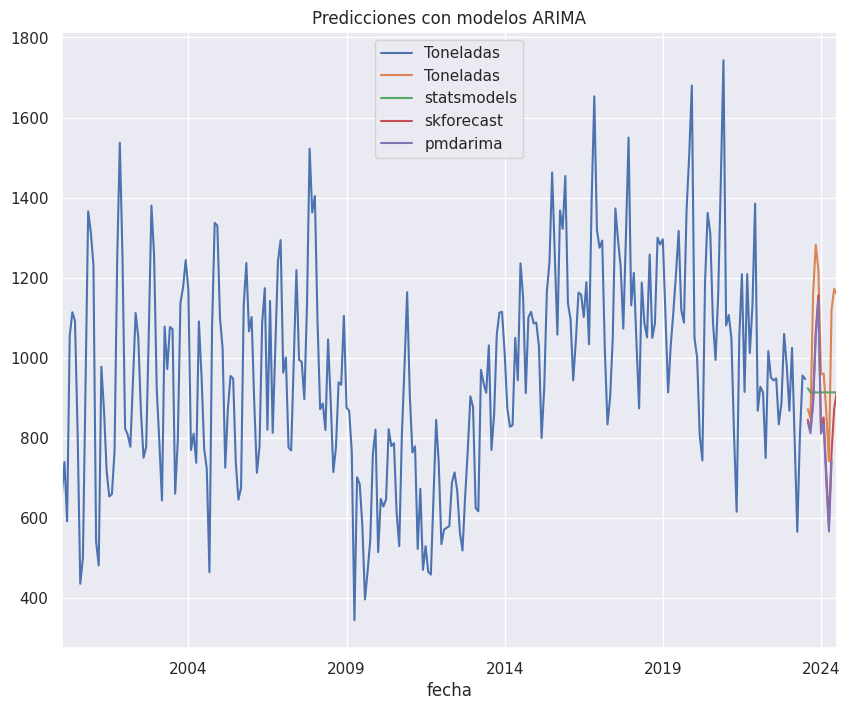

In [ ]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(10 , 8))
Entrenamiento_df.plot(ax=ax,label='Entrenamiento')
Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

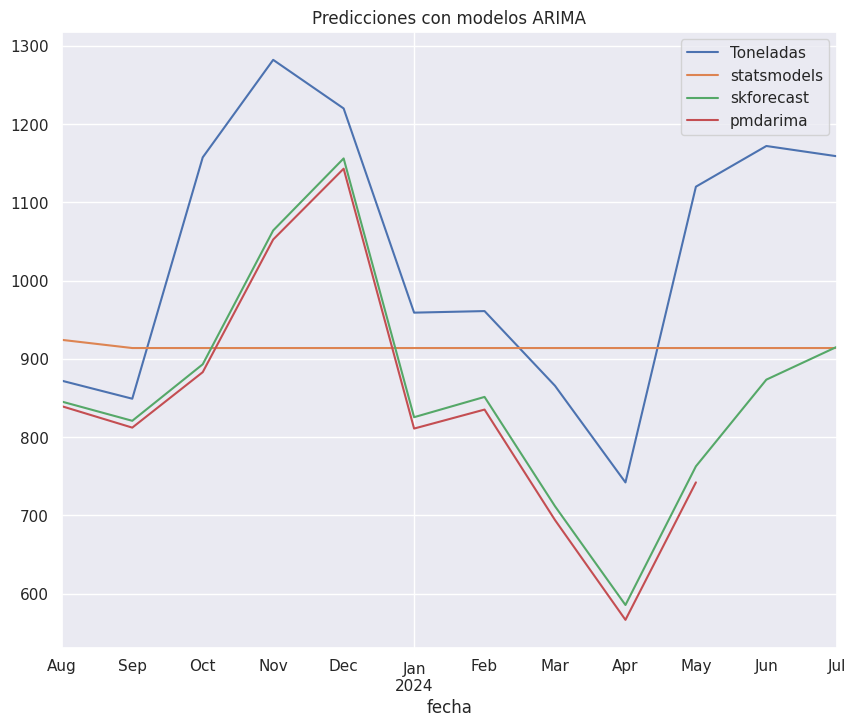

In [ ]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()


In [ ]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["valor"],Pr_skforecast)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Toneladas'],Pr_skforecast):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Toneladas'],Pr_skforecast):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Toneladas'], Pr_skforecast)*100:.2f}%")

MAE 171.24
MSE: 39789.40
RMSE: 199.47
MAPE: 16.18%


In [17]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["VALOR"],Pr_stmodels)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['VALOR'],Pr_stmodels):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['VALOR'],Pr_stmodels):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['VALOR'], Pr_stmodels)*100:.2f}%")

NameError: name 'Prueba_df' is not defined

In [ ]:
Pr_skforecast1 = Pr_skforecast.copy()
Pr_skforecast1 = modelo_SK.predict(steps=17)
print(Pr_skforecast1)

                   pred
2023-08-01   845.322013
2023-09-01   820.765616
2023-10-01   892.993551
2023-11-01  1064.065717
2023-12-01  1156.111881
2024-01-01   825.369708
2024-02-01   851.285140
2024-03-01   711.549760
2024-04-01   585.344121
2024-05-01   762.591987
2024-06-01   873.375366
2024-07-01   915.295164
2024-08-01   808.079788
2024-09-01   778.015912
2024-10-01   850.243847
2024-11-01  1021.316014
2024-12-01  1113.362177


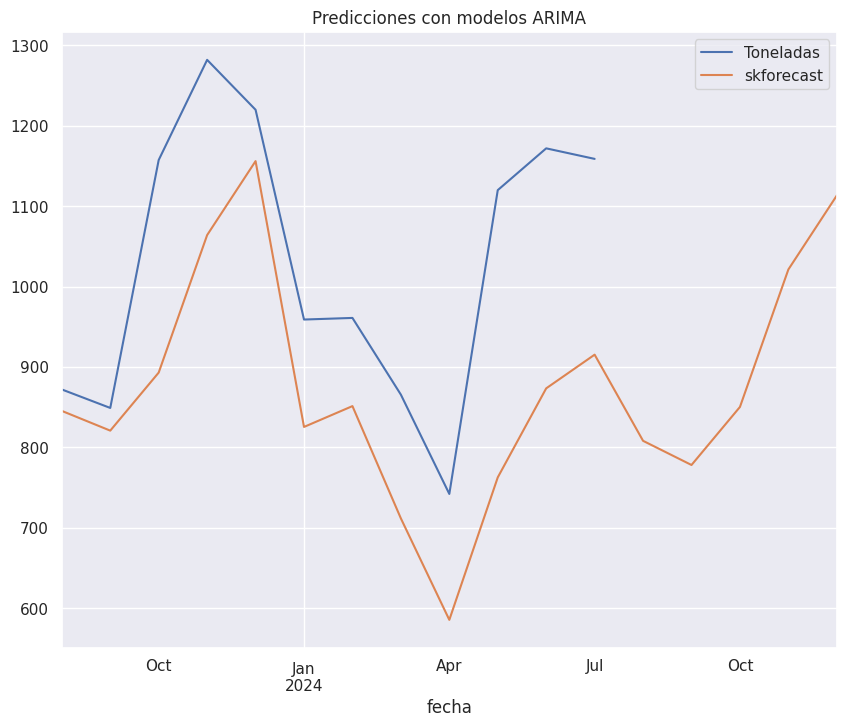

In [ ]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_skforecast1.columns = ['skforecast']
Pr_skforecast1.plot(ax=ax, label='skforecast')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

# Suavizado Exponencial


In [19]:
df_s = df.copy()

#Suavisado Exponencial Simple

df_s['HWES1'] = SimpleExpSmoothing(df_s['valor']).fit(optimized=True,use_brute=True).fittedvalues
df_s[['valor','HWES1']].plot(title = 'Suavizado exponencial simple',figsize=(15,10))

NameError: name 'SimpleExpSmoothing' is not defined

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial doble'}, xlabel='fecha'>

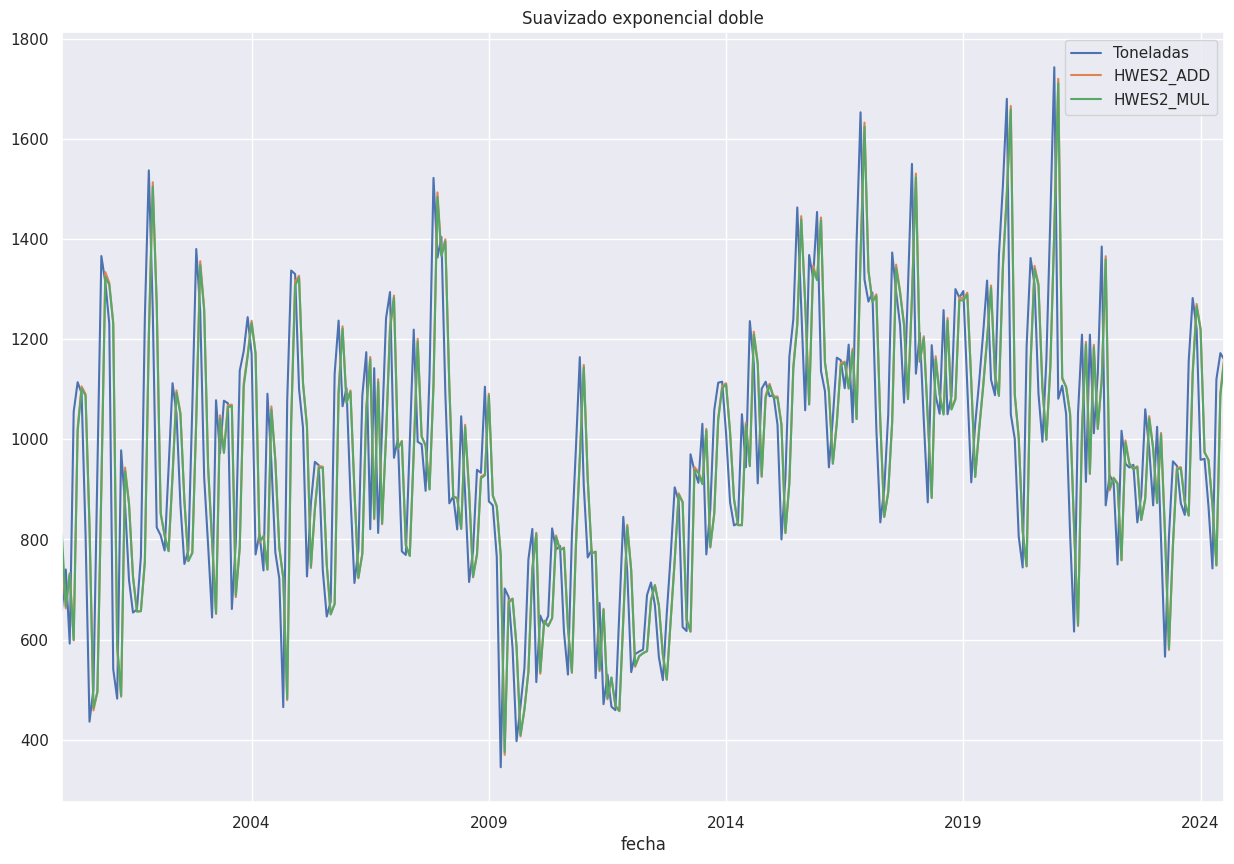

In [ ]:
# Suavizado Exponencial doble

df_s['HWES2_ADD'] = ExponentialSmoothing(df_s['valor'],trend='add').fit().fittedvalues
df_s['HWES2_MUL'] = ExponentialSmoothing(df_s['valor'],trend='mul').fit().fittedvalues
df_s[['valor', 'HWES2_ADD','HWES2_MUL']].plot(title = 'Suavizado exponencial doble',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Suavizado exponencial triple'}, xlabel='fecha'>

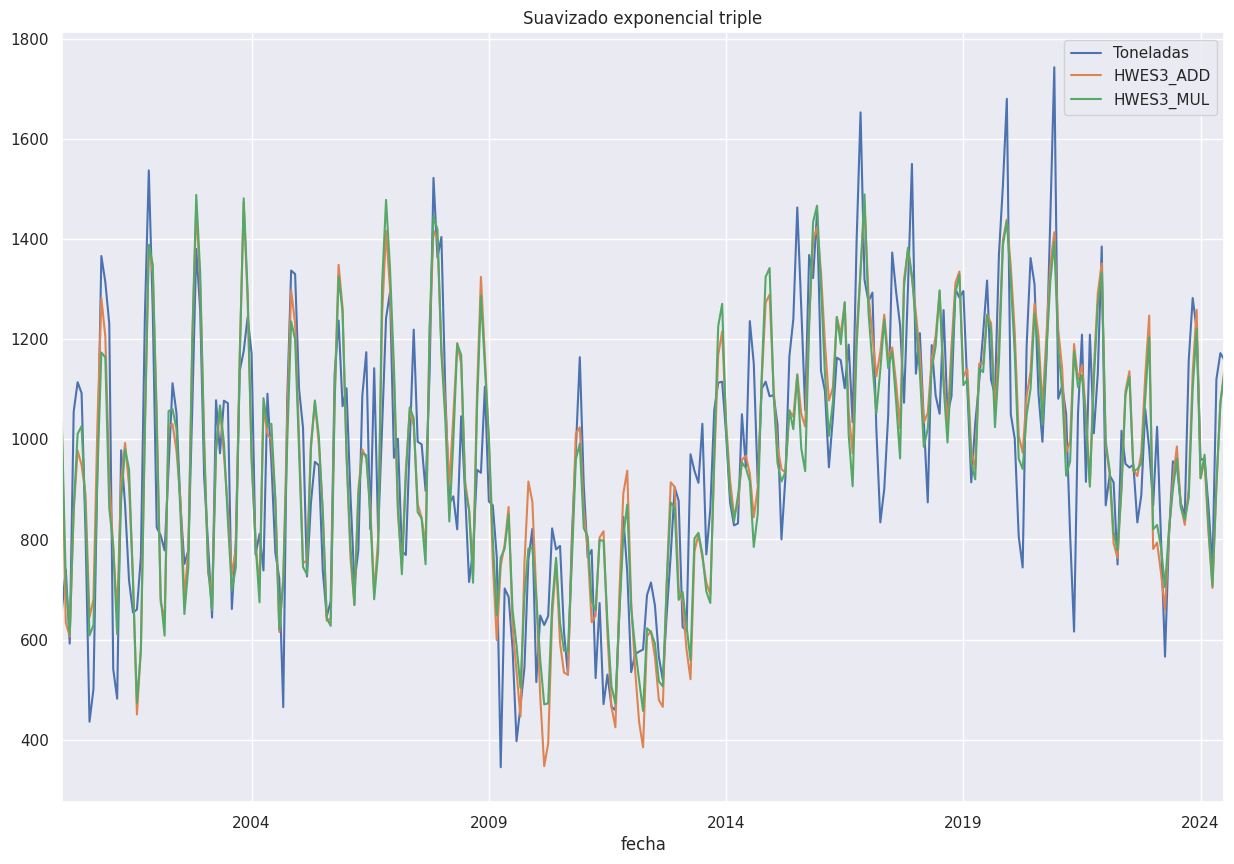

In [ ]:
df_s['HWES3_ADD'] = ExponentialSmoothing(df_s['valor'],trend='add',seasonal='add',seasonal_periods = 12).fit().fittedvalues
df_s['HWES3_MUL'] = ExponentialSmoothing(df_s['valor'],trend='mul',seasonal='mul',seasonal_periods = 12).fit().fittedvalues
df_s[['valor', 'HWES3_ADD','HWES3_MUL']].plot(title = 'Suavizado exponencial triple',figsize=(15,10))

In [ ]:
# Partiendo los datos entre entrenamiento y prueba

Entrenamiento_df_s= df_s[:980]
Prueba_df_s= df_s[980:]

display(Prueba_df_s,Entrenamiento_df_s)

,Toneladas,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
fecha,,,,,,
2023-08-01,872.000000,946.768659,944.304062,942.476950,866.941573,864.159999
2023-09-01,849.000000,877.474597,874.239940,873.684386,829.172468,839.349850
2023-10-01,1157.458473,851.084923,848.186570,847.325186,900.626460,883.383253
2023-11-01,1282.106637,1135.025657,1135.070344,1129.292268,1133.090090,1100.656392
2023-12-01,1220.000000,1271.337298,1270.259484,1265.303392,1258.579599,1220.978361
2024-01-01,959.000000,1223.758941,1220.912092,1218.387087,921.895621,922.181973
2024-02-01,961.000000,978.385775,973.545592,974.586140,957.784801,969.225801
2024-03-01,865.532563,962.272995,959.399073,958.043058,812.077775,824.957835
2024-04-01,742.000000,872.615943,869.171647,868.914324,702.984947,706.707706


,Toneladas,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
fecha,,,,,,
2000-01-01,658.000000,658.000000,766.528474,812.145455,1026.694957,1033.620866
2000-02-01,740.000000,658.000000,662.327741,666.332674,634.005039,718.381172
2000-03-01,592.000000,733.995921,732.293900,730.768671,606.219017,610.062188
2000-04-01,1055.000000,602.397008,598.367819,599.498852,857.701232,859.183647
2000-05-01,1114.000000,1021.860195,1022.843606,1015.488622,977.450577,1010.981304
...,...,...,...,...,...,...
2023-03-01,799.000000,1014.136178,1012.752731,1009.265455,732.088002,783.239951
2023-04-01,565.867207,814.752373,810.375690,811.510733,659.894864,704.986618
2023-05-01,806.195506,584.090697,579.170205,582.004429,811.981930,819.278643


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


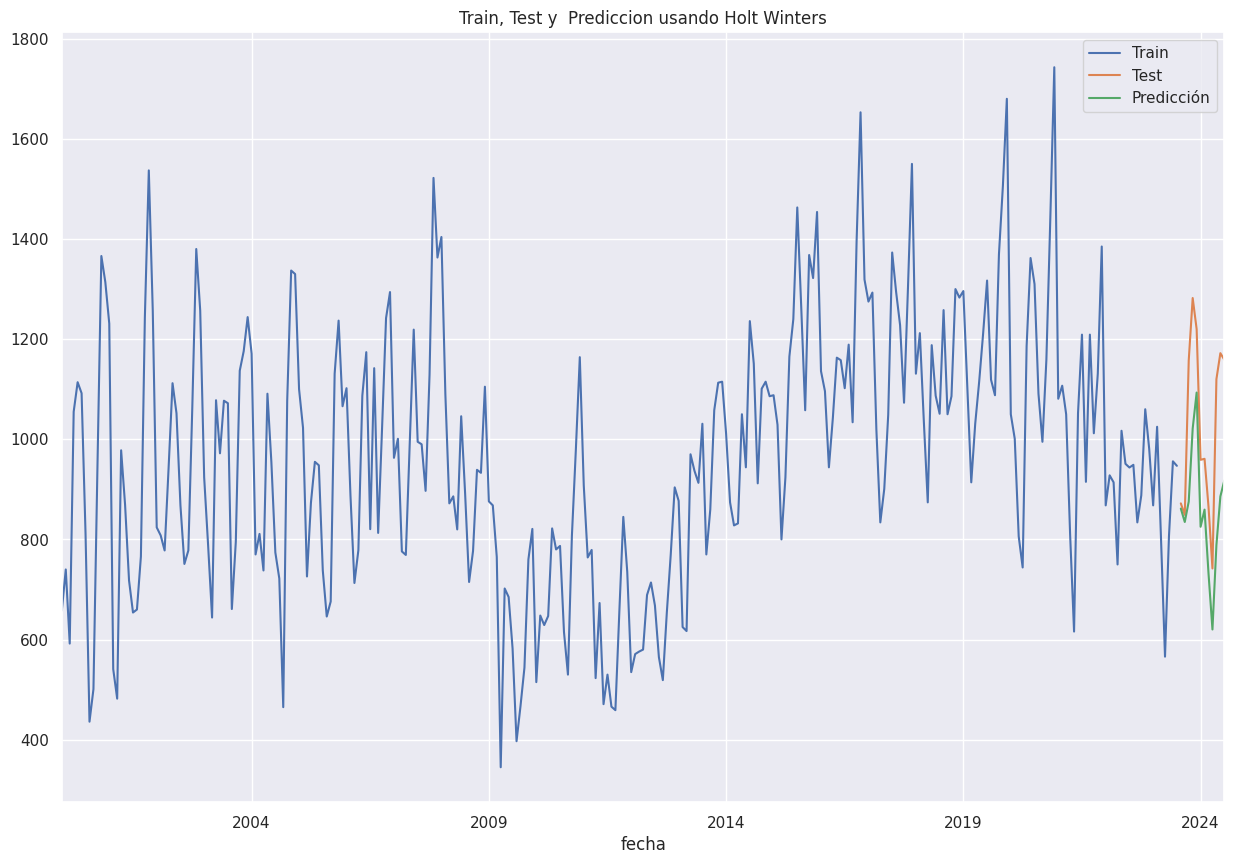

In [ ]:
fitted_model = ExponentialSmoothing(Entrenamiento_df_s["valor"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
Entrenamiento_df_s["valor"].plot(legend=True,label="Train")
Prueba_df_s["valor"].plot(legend=True,label="Test",figsize=(15,10))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

<Axes: xlabel='fecha'>

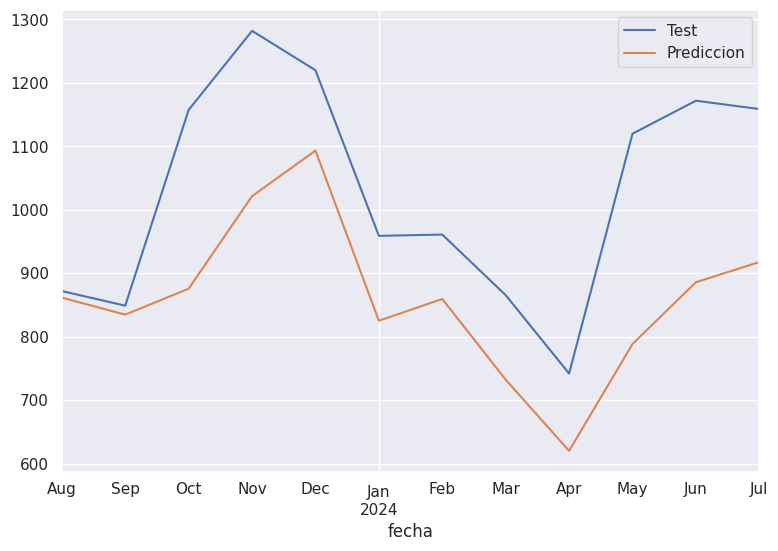

In [ ]:
Prueba_df_s['valor'].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion")

In [ ]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df_s["valor"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df_s['valor'],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df_s['valor'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df_s['valor'], test_predictions)*100:.2f}%")

MAE 170.22
MSE: 39527.28
RMSE: 198.81
MAPE: 15.75%


# Prophet

In [ ]:
%pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df_p = df.copy()
df_p.reset_index(inplace=True)
df_p.rename(columns={'fecha_corte':'ds','valor':'y'}, inplace=True)
df_p

,ds,y
0,2000-01-01,658.000000
1,2000-02-01,740.000000
2,2000-03-01,592.000000
3,2000-04-01,1055.000000
4,2000-05-01,1114.000000
...,...,...
290,2024-03-01,865.532563
291,2024-04-01,742.000000
292,2024-05-01,1120.000000
293,2024-06-01,1172.000000


In [ ]:
Entrenamiento_df_p= df_p[:980]
Prueba_df_p= df_p[980:]

display(Entrenamiento_df_p.tail(), Prueba_df_p.tail())

,ds,y
278,2023-03-01,799.000000
279,2023-04-01,565.867207
280,2023-05-01,806.195506
281,2023-06-01,956.000000
282,2023-07-01,947.000000


,ds,y
290,2024-03-01,865.532563
291,2024-04-01,742.000000
292,2024-05-01,1120.000000
293,2024-06-01,1172.000000
294,2024-07-01,1158.883752


In [ ]:
modelo = Prophet(growth='linear')

modelo.fit(Entrenamiento_df_p)

prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: /tmp/tmpby89l3y0/2ymym9yv.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpby89l3y0/3r09wa9u.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83984', 'data', 'file=/tmp/tmpby89l3y0/2ymym9yv.json', 'init=/tmp/tmpby89l3y0/3r09wa9u.json', 'output', 'file=/tmp/tmpby89l3y0/prophet_model5nqfp02i/prophet_model-20241012133201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:01 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
13:32:01 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing


In [ ]:
future = modelo.make_future_dataframe(periods=15,freq='MS')
forecast = modelo.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,971.760736,716.862714,1218.042218
1,2000-02-01,891.200217,639.039844,1134.055975
2,2000-03-01,756.027735,516.755021,1011.347339
3,2000-04-01,792.484218,572.310406,1027.074837
4,2000-05-01,936.917104,692.223644,1177.236746
...,...,...,...,...
293,2024-06-01,1137.388975,875.148020,1381.169518
294,2024-07-01,1098.078033,842.324110,1349.066772
295,2024-08-01,992.639971,752.395597,1246.772059
296,2024-09-01,951.028781,716.831061,1183.797825


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


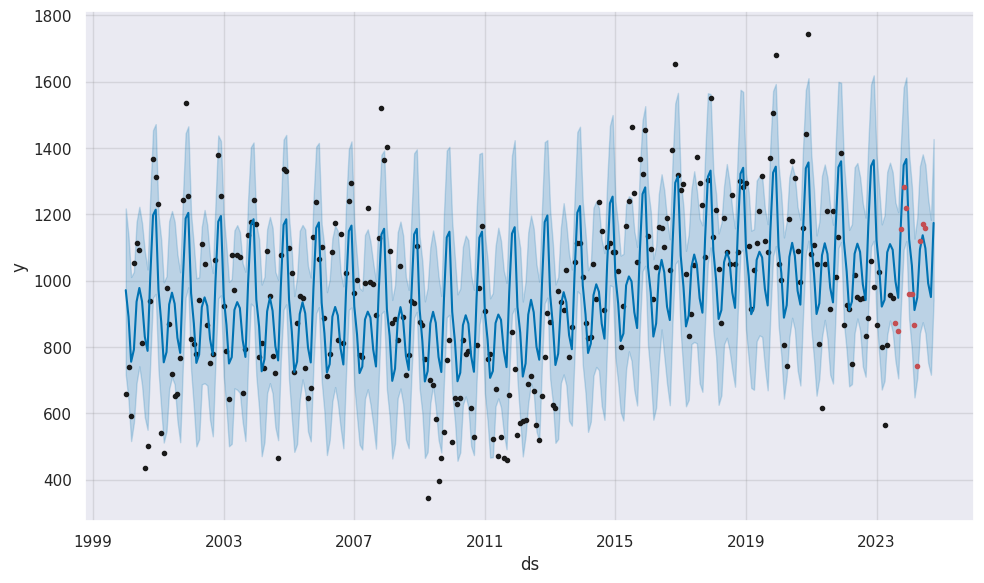

In [ ]:
fig = modelo.plot(forecast)
ax = fig.gca()
ax.plot(Prueba_df_p['ds'],Prueba_df_p['y'],'r.')

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

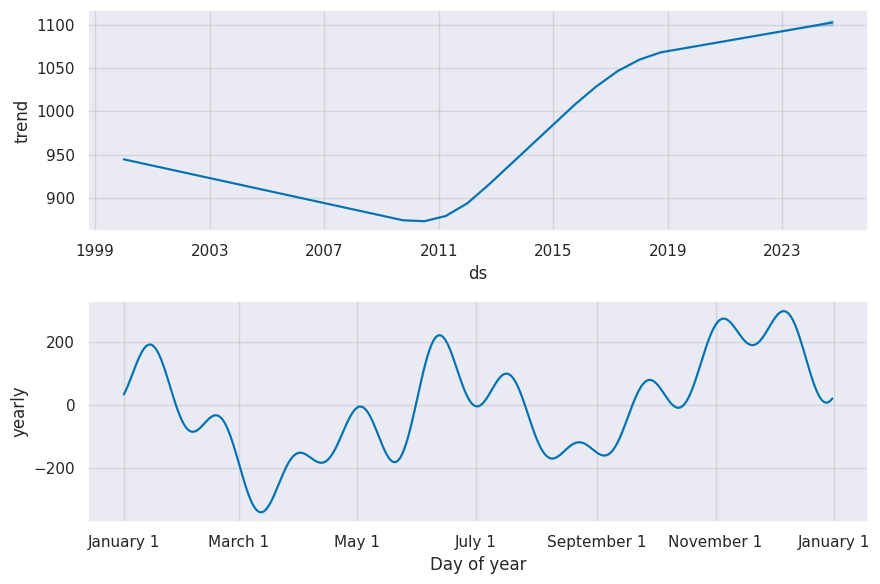

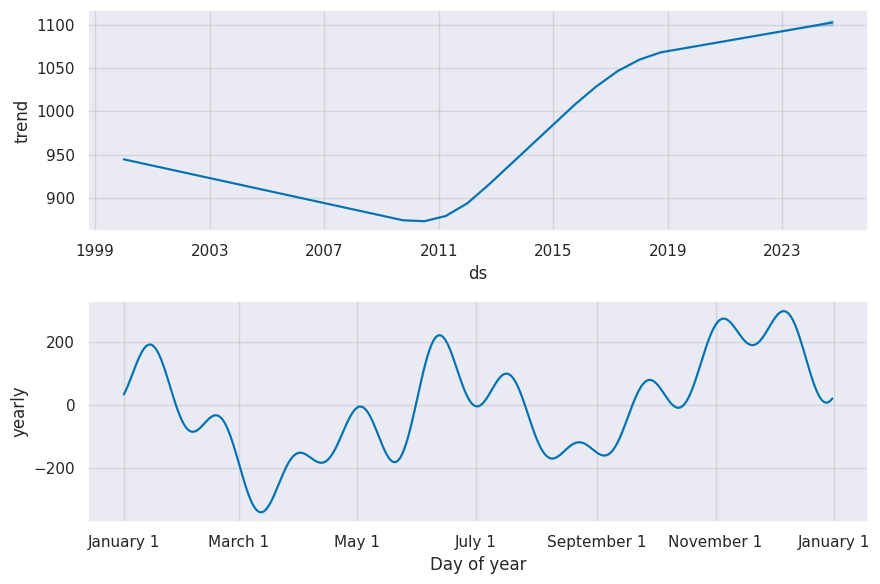

In [ ]:
modelo.plot_components(forecast)

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


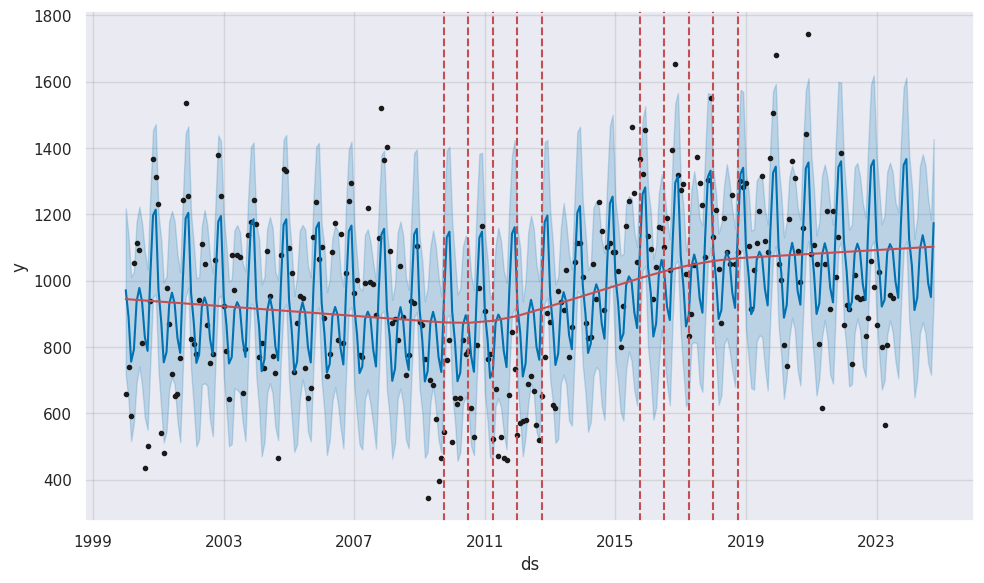

In [ ]:
fig = modelo.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), modelo,forecast)

In [ ]:
df_p_cv = cross_validation(modelo, initial='720 days',period='180 days',horizon='365 days')
df_p_cv

prophet    INFO  Making 42 forecasts with cutoffs between 2002-04-17 00:00:00 and 2022-07-01 00:00:00
  0%|          | 0/42 [00:00<?, ?it/s]prophet    INFO  n_changepoints greater than number of observations. Using 21.
cmdstanpy  DEBUG input tempfile: /tmp/tmpby89l3y0/pgex_xt6.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpby89l3y0/ft9n7jie.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98278', 'data', 'file=/tmp/tmpby89l3y0/pgex_xt6.json', 'init=/tmp/tmpby89l3y0/ft9n7jie.json', 'output', 'file=/tmp/tmpby89l3y0/prophet_modelii6kh94c/prophet_model-20241012133210.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:32:10 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
13:32:10 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done process

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-05-01,980.788654,873.348843,1091.398262,1112.000000,2002-04-17
1,2002-06-01,555.073146,451.860237,671.849522,1052.000000,2002-04-17
2,2002-07-01,530.046194,432.722786,645.832879,868.000000,2002-04-17
3,2002-08-01,738.009758,623.341105,846.528214,751.000000,2002-04-17
4,2002-09-01,744.917166,634.253655,859.100069,778.000000,2002-04-17
...,...,...,...,...,...,...
498,2023-03-01,1045.211718,800.299343,1280.177781,799.000000,2022-07-01
499,2023-04-01,1083.619301,844.529661,1315.344372,565.867207,2022-07-01
500,2023-05-01,1222.056341,974.172151,1451.699158,806.195506,2022-07-01
501,2023-06-01,1240.620318,992.875906,1491.024783,956.000000,2022-07-01


In [ ]:
df_per = performance_metrics(df_p_cv)
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,40580.017420,201.444825,159.620221,0.202765,0.144416,0.184468,0.660000
1,40 days,40252.592620,200.630488,158.627768,0.202550,0.139147,0.184099,0.660000
2,41 days,39899.919210,199.749641,157.097843,0.201338,0.139147,0.182764,0.660000
3,42 days,42802.733427,206.888215,160.854085,0.205301,0.139147,0.189971,0.660000
4,44 days,43365.109498,208.242910,162.312919,0.202887,0.139147,0.186950,0.640000
...,...,...,...,...,...,...,...,...
259,359 days,71889.477471,268.122132,205.638684,0.237451,0.199522,0.235550,0.566667
260,360 days,70130.563146,264.821757,205.210208,0.234572,0.205479,0.235969,0.550000
261,363 days,69057.870687,262.788643,200.917402,0.229053,0.191859,0.230967,0.560000
262,364 days,71092.884134,266.632489,203.667278,0.226441,0.191859,0.230313,0.540000


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


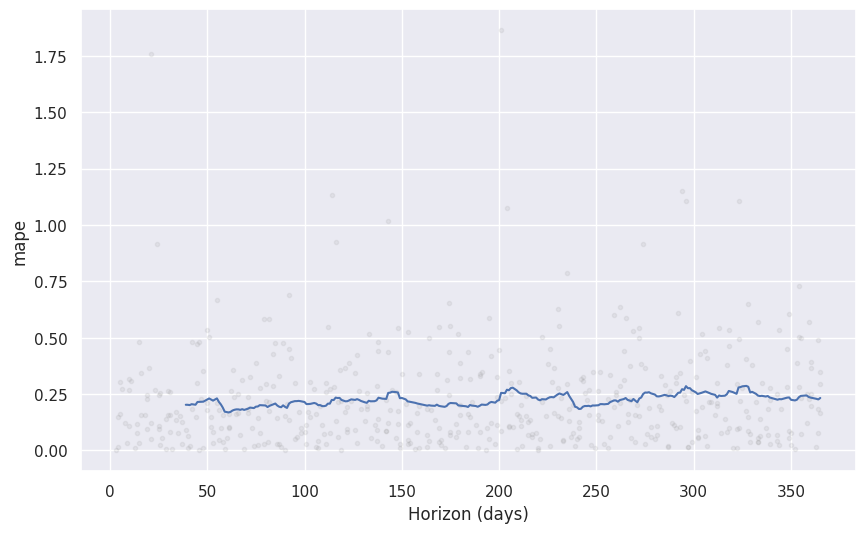

In [ ]:
fig = plot_cross_validation_metric(df_p_cv, metric='mape')